# Analysis of Synthetically Generated Data
Validating that the sampling produces data of the correct characteristics

In [3]:
import init
from common import constants as cn
from common.data_provider import DataProvider
from common import transform_data
from common_python.statistics import empirical_distribution_generator, density, multiple_density
from common_python.plots import util_plots

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

## Common Codes

In [2]:
def analyze(is_decorrelate):
    df_data = transform_data.aggregateGenes()
    df_data = df_data.T
    columns_data = df_data.columns
    df_data.columns = range(len(columns_data))
    empirical = empirical_distribution_generator.EmpiricalDistributionGenerator(df_data)
    df_gen = empirical.sample(1000, is_decorrelate=False)
    # Plot the marginals
    density_data = multiple_density.MultipleDensity(df_data, [-1, 0, 1])
    density_gen = multiple_density.MultipleDensity(df_gen, [-1, 0, 1])
    density_data.plotMarginalComparisons(density_gen, xlabel="Original", ylabel="Generated")
    # Plot the correlations
    df_corr_data = df_data.cor()
    util_plots.plotCategoricalHeatmap(df_corr_data, title="Original")
    df_corr_data = df_data.cor()
    util_plots.plotCategoricalHeatmap(df_corr_data, title="Original")
    

## Reproduce the original distribution

In [3]:
df_data = transform_data.aggregateGenes()
df_data = df_data.T
columns_data = df_data.columns
df_data.columns = range(len(columns_data))
empirical = empirical_distribution_generator.EmpiricalDistributionGenerator(df_data)
df_gen = empirical.sample(1000, is_decorrelate=False)


In [4]:
print("nrows: %d, ncols: %d" % (len(df_gen), len(df_gen.columns)))

nrows: 1000, ncols: 1515


In [5]:
density_gen = multiple_density.MultipleDensity(df_gen, [-1, 0, 1])

In [6]:
density_gen.df.head()

,0,1,2,3,4,5,6,7,8,9,...,1505,1506,1507,1508,1509,1510,1511,1512,1513,1514
-1,0.928,0.889,0.935,0.862,0.72,0.759,0.588,0.404,0.69,0.645,...,0.035,0.000,0.035,0.035,0.000,0.000,0.000,0.000,0.072,0.000
0,0.072,0.111,0.065,0.138,0.28,0.241,0.412,0.596,0.31,0.252,...,0.487,0.492,0.304,0.217,0.419,0.219,0.217,0.372,0.066,0.138
1,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.00,0.103,...,0.478,0.508,0.661,0.748,0.581,0.781,0.783,0.628,0.862,0.862


In [7]:
density_raw = multiple_density.MultipleDensity(df_data, [-1, 0, 1])
density_raw.df.head()

,0,1,2,3,4,5,6,7,8,9,...,1505,1506,1507,1508,1509,1510,1511,1512,1513,1514
-1,0.923077,0.884615,0.923077,0.846154,0.692308,0.769231,0.576923,0.384615,0.653846,0.615385,...,0.038462,0.0,0.038462,0.038462,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000
0,0.076923,0.115385,0.076923,0.153846,0.307692,0.230769,0.423077,0.615385,0.346154,0.269231,...,0.500000,0.5,0.307692,0.230769,0.423077,0.230769,0.230769,0.384615,0.076923,0.153846
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.115385,...,0.461538,0.5,0.653846,0.730769,0.576923,0.769231,0.769231,0.615385,0.846154,0.846154


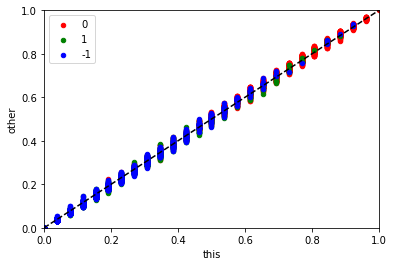

In [8]:
density_raw.plotMarginalComparisons(density_gen)

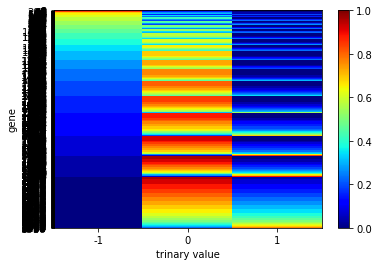

In [9]:
_ = density_raw.plotMarginals(xlabel="trinary value", ylabel="gene")

## Reproduce the original covariance structure

In [10]:
df_corr_raw = df_data.corr()
len(df_corr_raw)

1515

In [11]:
df_corr_raw_adj = df_corr_raw -pd.DataFrame(np.identity(1515))
df_corr_raw_adj.head()

,0,1,2,3,4,5,6,7,8,9,...,1505,1506,1507,1508,1509,1510,1511,1512,1513,1514
0,0.000000,0.347524,0.458333,0.276956,0.120281,0.184466,0.337100,0.228218,0.396746,0.416333,...,-0.215562,-0.288675,-0.317221,-0.371154,-0.337100,-0.527046,-0.184466,-0.365148,-0.636501,-0.677003
1,0.347524,0.000000,0.347524,0.179664,0.280900,0.373649,0.178068,0.038069,0.243315,0.260434,...,-0.482167,-0.361158,-0.611842,-0.464345,-0.421741,-0.373649,-0.373649,-0.456832,-0.482617,-0.513327
2,0.458333,0.347524,0.000000,0.677003,0.433013,0.184466,0.337100,0.228218,0.396746,0.208167,...,-0.215562,0.000000,-0.059479,-0.103098,-0.044947,-0.184466,-0.527046,-0.365148,-0.135015,-0.276956
3,0.276956,0.179664,0.677003,0.000000,0.639602,0.019462,0.497930,0.337100,0.586033,0.307482,...,-0.318406,-0.213201,0.102499,0.045686,0.149379,-0.019462,-0.272475,-0.320245,-0.014245,-0.113636
4,0.120281,0.280900,0.433013,0.639602,0.000000,-0.167360,0.441149,0.527046,0.565916,0.480740,...,-0.350736,-0.166667,-0.137361,-0.238095,0.064875,-0.228218,-0.030429,-0.329404,-0.311805,-0.408635


In [12]:
xx = [max(np.abs(df_corr_raw_adj[c])) for i, c in enumerate(df_corr_raw_adj.columns)]

In [13]:
len([v for v in xx if v > 0.9])

805

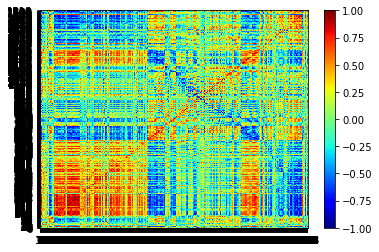

In [14]:
util_plots.plotCategoricalHeatmap(df_corr_raw)

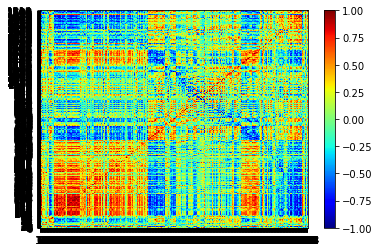

In [15]:
df_corr_gen = df_gen.corr()
util_plots.plotCategoricalHeatmap(df_corr_gen)

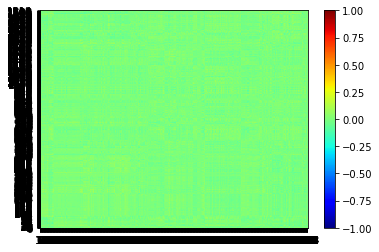

In [16]:
# Differences in correlation structure
util_plots.plotCategoricalHeatmap(df_corr_raw - df_corr_gen, vmin=-1.0, vmax=1.0)

In [17]:
df_corr_gen.head()

,0,1,2,3,4,5,6,7,8,9,...,1505,1506,1507,1508,1509,1510,1511,1512,1513,1514
0,1.000000,0.332613,0.475802,0.281136,0.127864,0.159634,0.332761,0.229329,0.415562,0.436385,...,-0.219249,-0.283036,-0.316185,-0.378972,-0.328000,-0.526012,-0.181850,-0.361910,-0.652412,-0.696156
1,0.332613,1.000000,0.358786,0.181662,0.275940,0.366569,0.156958,0.024938,0.244968,0.255824,...,-0.476104,-0.359054,-0.603143,-0.444310,-0.416094,-0.351699,-0.400916,-0.459112,-0.467139,-0.504706
2,0.475802,0.358786,1.000000,0.658969,0.422803,0.183380,0.314986,0.217079,0.393364,0.212036,...,-0.207537,-0.024504,-0.078630,-0.126517,-0.063839,-0.203668,-0.500843,-0.342578,-0.155570,-0.306139
3,0.281136,0.181662,0.658969,1.000000,0.641613,0.011809,0.477998,0.329423,0.596939,0.321769,...,-0.314942,-0.232584,0.087338,0.025483,0.134111,-0.033497,-0.246566,-0.273924,-0.031354,-0.134134
4,0.127864,0.275940,0.422803,0.641613,1.000000,-0.169138,0.401095,0.513429,0.564387,0.468455,...,-0.328612,-0.161446,-0.126327,-0.236465,0.073668,-0.213687,-0.022909,-0.284953,-0.308860,-0.402687


## Maintain marginals with random replacement, but eliminate covariances.

In [4]:
df_trinary = transform_data.aggregateGenes()
df_data = df_trinary.T
df_data = df_data.drop(index="T0")
df_data = df_data.copy()

In [5]:
generator = empirical_distribution_generator.EmpiricalDistributionGenerator(df_data)
df_gen = generator.synthesize(25, 0.0)

In [9]:
def plotSynthesizes(frac):
    SEL_FRAC = 0.5
    ncols = int(SEL_FRAC*len(df_data.columns))
    columns_sub = np.random.permutation(df_data.columns.tolist())[range(ncols)]
    df_sub = df_data[list(columns_sub)]
    generator = empirical_distribution_generator.EmpiricalDistributionGenerator(df_sub)
    df_sub.columns = range(len(columns_sub))
    df_gen = generator.synthesize(len(df_data), frac)
    trunc_frac = int(100*frac)
    util_plots.plotCategoricalHeatmap(df_gen.corr(), vmin=-1, vmax=1, title="Decor Pct: %d" % trunc_frac)

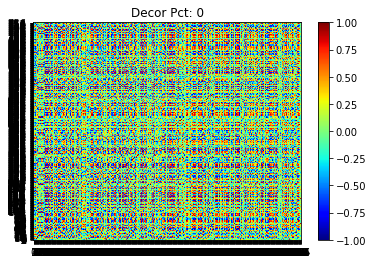

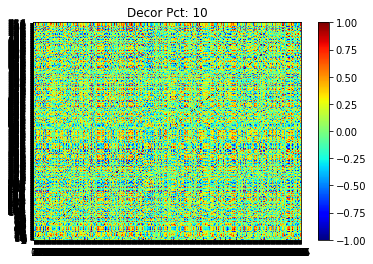

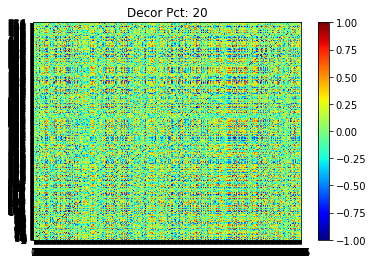

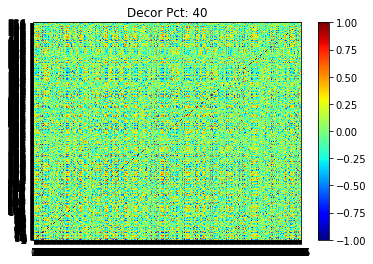

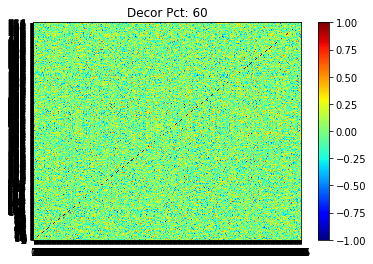

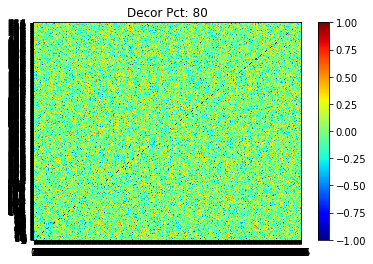

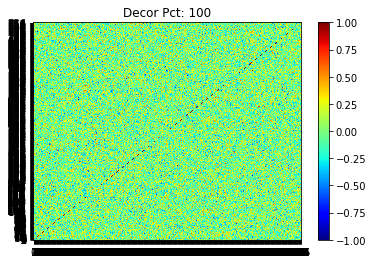

In [7]:
for frac in [0.0, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0]:
    plt.figure()
    df = plotSynthesizes(frac)